# IMPORT LIBRERIES

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

In [37]:
df = pd.read_csv("stores_sales_forecasting.csv" , encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12-05-2016,12-10-2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,09-06-2015,09-09-2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [38]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [39]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12-05-2016,12-10-2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,09-06-2015,09-09-2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [41]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [42]:
df.shape

(2121, 21)

In [43]:
df.size

44541

# convert data column to datatime

In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [45]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort by date
df = df.sort_values('Order Date')

# Set Order Date as index
df.set_index('Order Date', inplace=True)

# Check dataset info
print(df.head())


            Row ID        Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                                   
2014-01-06    7475  CA-2014-167199  01-10-2014  Standard Class    ME-17320   
2014-01-07    7661  CA-2014-105417  01-12-2014  Standard Class    VS-21820   
2014-01-10     867  CA-2014-149020   1/15/2014  Standard Class    AJ-10780   
2014-01-11     717  CA-2014-130092   1/14/2014     First Class    SV-20365   
2014-02-08    9267  CA-2014-125759  02-09-2014     First Class    NM-18445   

               Customer Name      Segment        Country             City  \
Order Date                                                                  
2014-01-06     Maria Etezadi  Home Office  United States        Henderson   
2014-01-07  Vivek Sundaresam     Consumer  United States       Huntsville   
2014-01-10    Anthony Jacobs    Corporate  United States      Springfield   
2014-01-11       Seth Vernon     Consumer  United States            

# Aggregate Sales by Month / Week

# monthly sales

In [51]:
monthly_sales = df['Sales'].resample('M').sum()
print(monthly_sales.head())

Order Date
2014-01-31    2712.428
2014-02-28    1794.178
2014-03-31    3798.101
2014-04-30    2921.615
2014-05-31    3854.746
Name: Sales, dtype: float64


C:\Users\Bergith Shafro\AppData\Local\Temp\ipykernel_16928\4035699210.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


# weekly sales

In [49]:
weekly_sales = df['Sales'].resample('W').sum()
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,01-10-2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.8200,9,0.00,746.4078
2014-01-07,7661,CA-2014-105417,01-12-2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.7280,3,0.60,-53.7096
2014-01-10,867,CA-2014-149020,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.9400,1,0.00,21.2954
2014-01-11,717,CA-2014-130092,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.9400,2,0.00,3.0814
2014-02-08,9267,CA-2014-125759,02-09-2014,First Class,NM-18445,Nathan Mautz,Home Office,United States,North Las Vegas,Nevada,89031,West,FUR-FU-10002111,Furniture,Furnishings,"Master Caster Door Stop, Large Brown",14.5600,2,0.00,5.5328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,9932,CA-2015-104948,11/17/2015,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,California,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
NaT,9956,CA-2015-141593,12/16/2015,Second Class,DB-12970,Darren Budd,Corporate,United States,Los Angeles,California,90045,West,FUR-TA-10002622,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",273.5680,2,0.20,10.2588
NaT,9963,CA-2015-168088,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704


# plot sales trend and over time

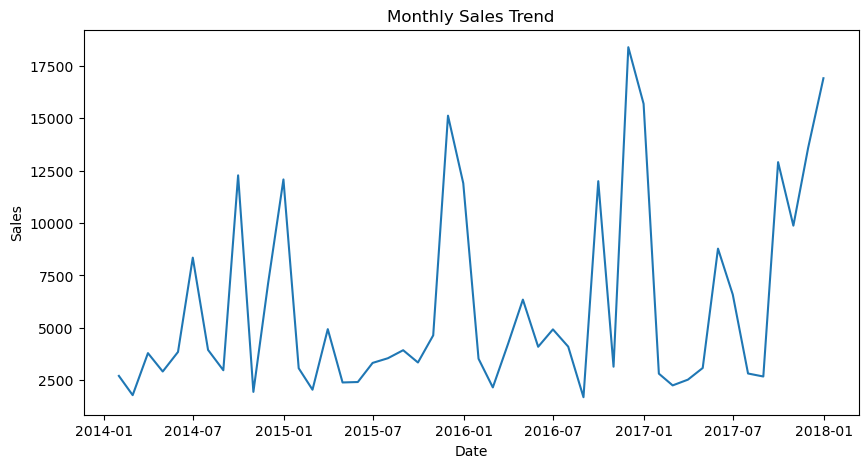

In [52]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Check Seasonality using Rolling Mean

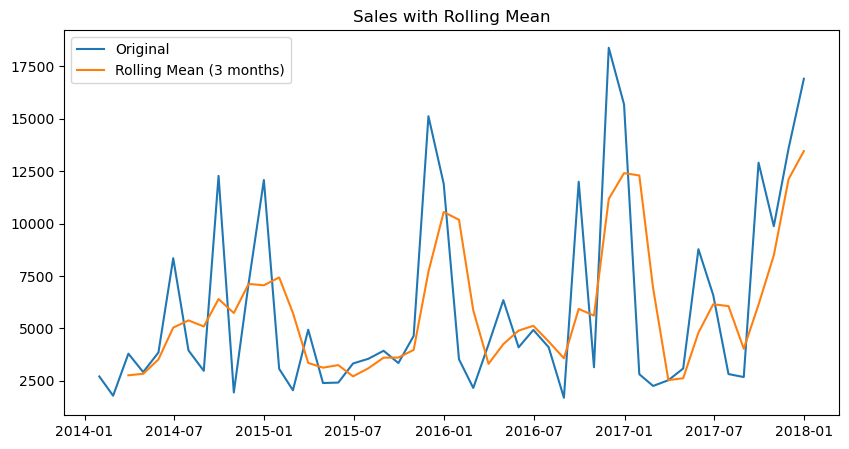

In [53]:
rolling_mean = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label="Original")
plt.plot(rolling_mean, label="Rolling Mean (3 months)")
plt.legend()
plt.title("Sales with Rolling Mean")
plt.show()

# Train-Test Split (Time Based)

In [54]:
train_size = int(len(monthly_sales) * 0.8)

train = monthly_sales[:train_size]
test = monthly_sales[train_size:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 38
Test size: 10


# Moving Average Forecast

In [55]:
window = 3
moving_avg_forecast = train.rolling(window=window).mean().iloc[-1]

# Predict same value for test period
ma_predictions = [moving_avg_forecast] * len(test)

# Exponential Smoothing Model

In [56]:
model = ExponentialSmoothing(train, trend='add', seasonal=None)
fit_model = model.fit()

forecast = fit_model.forecast(len(test))

C:\Users\Bergith Shafro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


# Plot Forecast

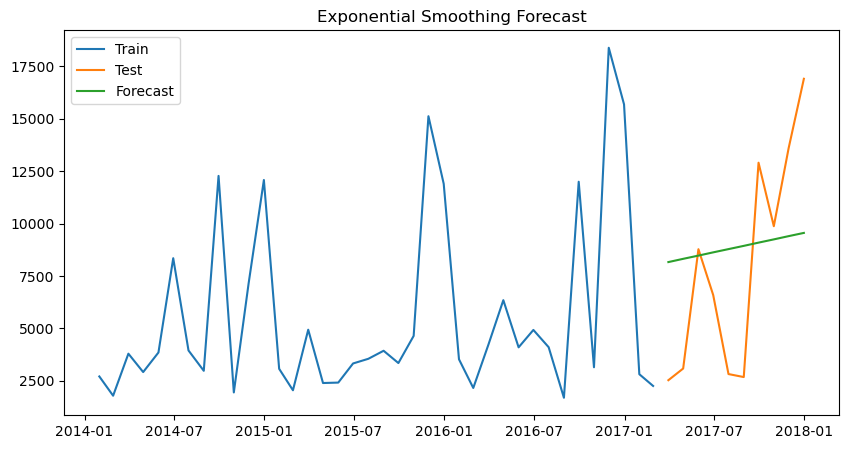

In [57]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title("Exponential Smoothing Forecast")
plt.show()

# Calculate Error Metrics (MAE & MAPE)

In [58]:
mae = mean_absolute_error(test, forecast)

mape = np.mean(np.abs((test - forecast) / test)) * 100

print("MAE:", mae)
print("MAPE:", mape)

MAE: 4138.8980960585595
MAPE: 97.9898505187758


# Forecast Next Period Sales

In [59]:
future_forecast = fit_model.forecast(3)  # next 3 months
print("Next Period Forecast:")
print(future_forecast)

Next Period Forecast:
2017-03-31    8165.715558
2017-04-30    8320.234049
2017-05-31    8474.752541
Freq: ME, dtype: float64


#  Export Forecast to CSV

In [60]:
forecast_df = pd.DataFrame({
    'Actual': test,
    'Forecast': forecast
})

forecast_df.to_csv("sales_forecast_results.csv")
print("Forecast exported successfully!")

Forecast exported successfully!
